In [1]:
# Libraries
library(tidyverse)
library(hrbrthemes)
library(viridis)
library(ggplot2)
library("rjson")

── Attaching packages ─────────────────────────────────────────────────────────────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.8     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

NOTE: Either Arial Narrow or Roboto Condensed fonts are required to use these themes.

      Please use hrbrthemes::import_roboto_condensed() to install Roboto Condensed and

      if Arial Narrow is not on your system, please see https://bit.ly/arialnarrow

Loading required package: viridisLite



In [6]:
dataset = "atac_subsample"
metadata = read.table("/mnt/lab_data2/anusri/chrombpnet/model_dir_subsample_atac.csv", sep=",", header=FALSE)
colnames(metadata) = c("fold", "readdepth", "cell_type", "model_dir")

In [7]:
head(metadata)

,fold,readdepth,cell_type,model_dir
,<chr>,<chr>,<chr>,<chr>
1,fold_0,572M,GM12878,/mnt/lab_data2/anusri/chrombpnet/results/chrombpnet/ATAC_PE/GM12878/nautilus_runs/GM12878_03.01.2022_bias_128_4_1234_0.4_fold_0
2,fold_1,572M,GM12878,/oak/stanford/groups/akundaje/projects/chromatin-atlas-2022/chrombpnet/folds/ATAC/GM12878/GM12878_07.08.2022_bias_128_4_1234_0.4_fold_1_data_type_ATAC_PE
3,fold_2,572M,GM12878,/oak/stanford/groups/akundaje/projects/chromatin-atlas-2022/chrombpnet/folds/ATAC/GM12878/GM12878_07.08.2022_bias_128_4_1234_0.4_fold_2_data_type_ATAC_PE
4,fold_3,572M,GM12878,/oak/stanford/groups/akundaje/projects/chromatin-atlas-2022/chrombpnet/folds/ATAC/GM12878/GM12878_07.14.2022_bias_128_4_1234_0.4_fold_3_data_type_ATAC_PE
5,fold_4,572M,GM12878,/oak/stanford/groups/akundaje/projects/chromatin-atlas-2022/chrombpnet/folds/ATAC/GM12878/GM12878_07.07.2022_bias_128_4_1234_0.4_fold_4_data_type_ATAC_PE
6,fold_0,250M,GM12878,/oak/stanford/groups/akundaje/projects/chromatin-atlas-2022/chrombpnet/folds/ATAC/GM12878_250M/GM12878_250M_07.19.2022_bias_transfer_1234_fold_0_data_type_ATAC_PE


In [8]:
counts_peaks = list()
counts_peaks_nonpeaks = list()
profile_peaks = list()
profile_peaks_nonpeaks = list(
)
for (i in 1:nrow(metadata)){
        inputf = file.path(metadata[i,"model_dir"], "chrombpnet_model/chrombpnet_metrics.json")
        result <- fromJSON(file = inputf)
        counts_peaks = append(counts_peaks, result$counts_metrics$peaks$pearsonr)
        counts_peaks_nonpeaks = append(counts_peaks_nonpeaks, result$counts_metrics$peaks_and_nonpeaks$pearsonr)
        profile_peaks = append(profile_peaks, result$profile_metrics$peaks$median_norm_jsd)
        profile_peaks_nonpeaks = append(profile_peaks_nonpeaks, result$profile_metrics$peaks_and_nonpeaks$median_norm_jsd)
    
}

In [15]:
metadata$counts_pearsonr_in_peaks = as.numeric(counts_peaks)
metadata$counts_pearsonr_in_peaks_nonpeaks = as.numeric(counts_peaks_nonpeaks)
metadata$profile_jsd_in_peaks = as.numeric(profile_peaks)
metadata$profile_jsd_in_peaks_nonpeaks = as.numeric(profile_peaks_nonpeaks)

metadata$readdepth <- factor(metadata$readdepth , levels=c("572M", "250M", "100M", "50M", "25M", "5M"))


In [16]:
head(metadata)

,fold,readdepth,cell_type,model_dir,counts_pearsonr_in_peaks,counts_pearsonr_in_peaks_nonpeaks,profile_jsd_in_peaks,profile_jsd_in_peaks_nonpeaks
,<chr>,<fct>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
1,fold_0,572M,GM12878,/mnt/lab_data2/anusri/chrombpnet/results/chrombpnet/ATAC_PE/GM12878/nautilus_runs/GM12878_03.01.2022_bias_128_4_1234_0.4_fold_0,0.6330793,0.7397478,0.5165552,0.6932337
2,fold_1,572M,GM12878,/oak/stanford/groups/akundaje/projects/chromatin-atlas-2022/chrombpnet/folds/ATAC/GM12878/GM12878_07.08.2022_bias_128_4_1234_0.4_fold_1_data_type_ATAC_PE,0.6203872,0.7220585,0.5145949,0.6938937
3,fold_2,572M,GM12878,/oak/stanford/groups/akundaje/projects/chromatin-atlas-2022/chrombpnet/folds/ATAC/GM12878/GM12878_07.08.2022_bias_128_4_1234_0.4_fold_2_data_type_ATAC_PE,0.6564146,0.6928328,0.5159125,0.6850709
4,fold_3,572M,GM12878,/oak/stanford/groups/akundaje/projects/chromatin-atlas-2022/chrombpnet/folds/ATAC/GM12878/GM12878_07.14.2022_bias_128_4_1234_0.4_fold_3_data_type_ATAC_PE,0.6095498,0.7333907,0.5148285,0.6942917
5,fold_4,572M,GM12878,/oak/stanford/groups/akundaje/projects/chromatin-atlas-2022/chrombpnet/folds/ATAC/GM12878/GM12878_07.07.2022_bias_128_4_1234_0.4_fold_4_data_type_ATAC_PE,0.6474911,0.7183592,0.5084879,0.6928442
6,fold_0,250M,GM12878,/oak/stanford/groups/akundaje/projects/chromatin-atlas-2022/chrombpnet/folds/ATAC/GM12878_250M/GM12878_250M_07.19.2022_bias_transfer_1234_fold_0_data_type_ATAC_PE,0.6234052,0.7555299,0.5903863,0.7695441


Saving 6.67 x 6.67 in image



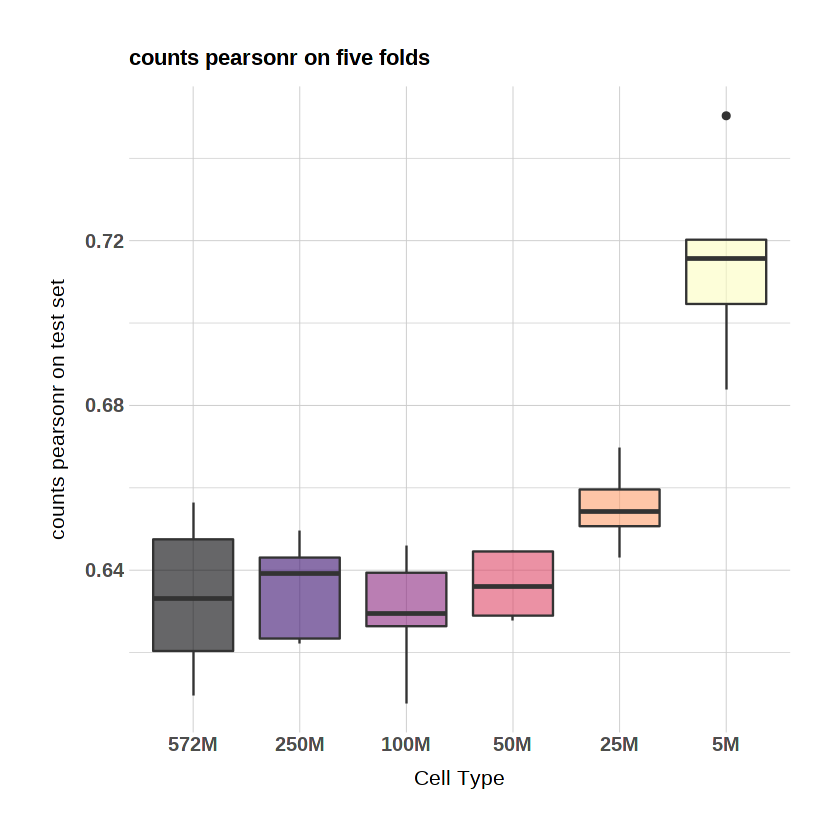

In [17]:
# Boxplot basic

metadata %>%
  ggplot( aes(x=readdepth, y=counts_pearsonr_in_peaks, fill=readdepth)) +
    geom_boxplot() + 
    scale_fill_viridis(discrete = TRUE, alpha=0.6, option="A") +
    theme_ipsum() +
    theme(
      legend.position="none",
      plot.title = element_text(size=13),
     axis.text=element_text(size=20, face="bold"),
     axis.title=element_text(size=30,face="bold"),
     axis.title.y = element_text(margin = margin(t = 0, r = 10, b = 0, l = 0), hjust = 0.5, size=12),
     axis.title.x = element_text(margin = margin(t = 10, r = 0, b = 0, l = 0), hjust = 0.5, size=12),
        
    ) +
    ggtitle("counts pearsonr on five folds") +
    xlab("Cell Type") + 
    ylab("counts pearsonr on test set")

ggsave(paste(dataset,"_counts_pearsonr_peaks.png"))

Saving 6.67 x 6.67 in image



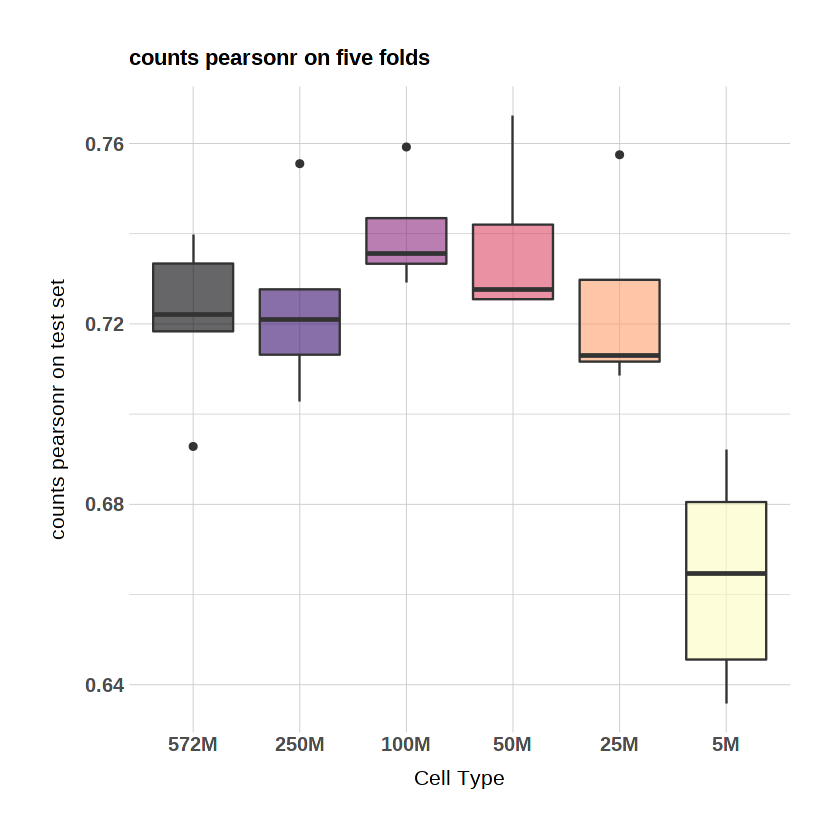

In [18]:
# Boxplot basic

metadata %>%
  ggplot( aes(x=readdepth, y=counts_pearsonr_in_peaks_nonpeaks, fill=readdepth)) +
    geom_boxplot() + 
    scale_fill_viridis(discrete = TRUE, alpha=0.6, option="A") +
    theme_ipsum() +
    theme(
      legend.position="none",
      plot.title = element_text(size=13),
     axis.text=element_text(size=20, face="bold"),
     axis.title=element_text(size=30,face="bold"),
     axis.title.y = element_text(margin = margin(t = 0, r = 10, b = 0, l = 0), hjust = 0.5, size=12),
     axis.title.x = element_text(margin = margin(t = 10, r = 0, b = 0, l = 0), hjust = 0.5, size=12),
        
    ) +
    ggtitle("counts pearsonr on five folds") +
    xlab("Cell Type") + 
    ylab("counts pearsonr on test set")

ggsave(paste(dataset,"_counts_pearsonr_peaks_nonpeaks.png"))

Saving 6.67 x 6.67 in image



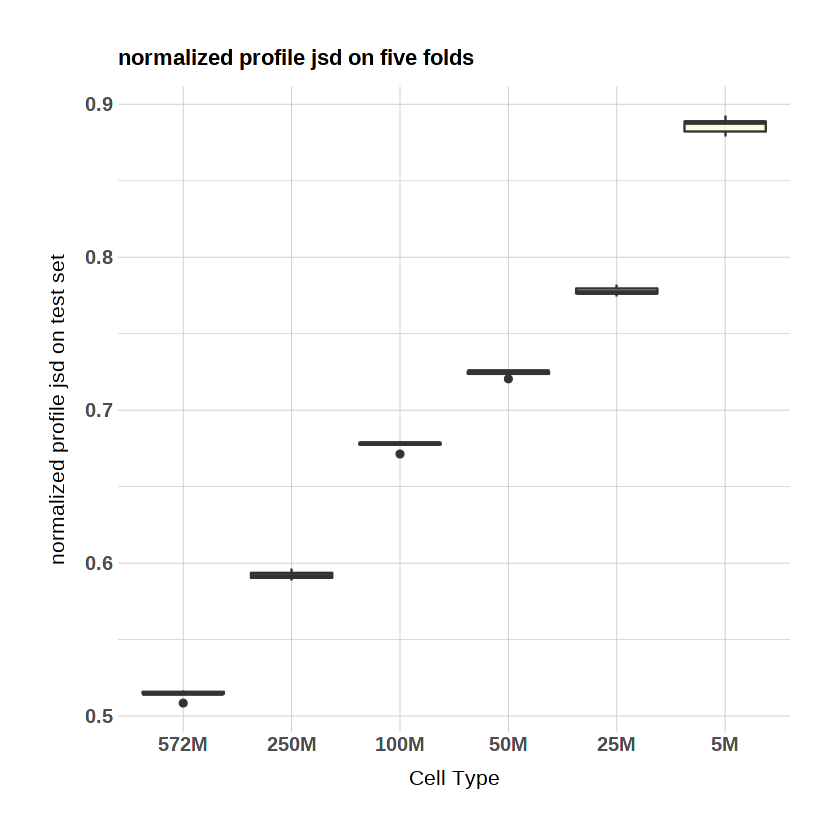

In [19]:
# Boxplot basic
metadata %>%
  ggplot( aes(x=readdepth, y=profile_jsd_in_peaks, fill=readdepth)) +
    geom_boxplot() + 
    scale_fill_viridis(discrete = TRUE, alpha=0.6, option="A") +
    theme_ipsum() +
    theme(
      legend.position="none",
      plot.title = element_text(size=13),
     axis.text=element_text(size=18, face="bold"),
     axis.title=element_text(size=18,face="bold"),
     axis.title.y = element_text(margin = margin(t = 0, r = 10, b = 0, l = 0), hjust = 0.5, size=12),
     axis.title.x = element_text(margin = margin(t = 10, r = 0, b = 0, l = 0), hjust = 0.5, size=12),
        
    ) +
    ggtitle("normalized profile jsd on five folds") +
    xlab("Cell Type") + 
    ylab("normalized profile jsd on test set")

ggsave(paste(dataset,"_profile_jsd_peaks.png"))

Saving 6.67 x 6.67 in image



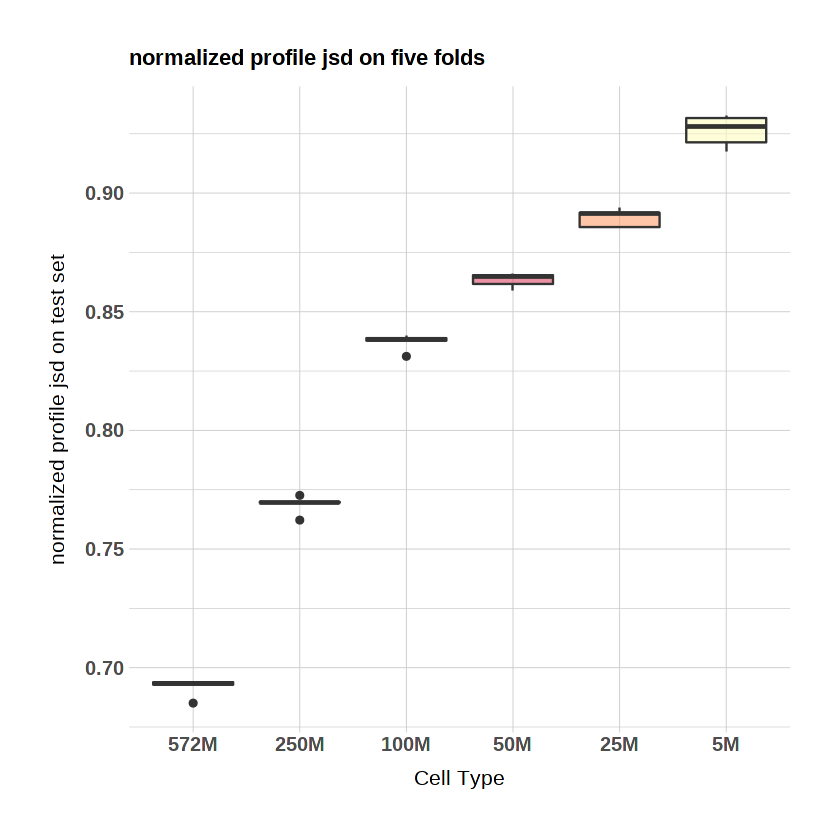

In [20]:
# Boxplot basic
metadata %>%
  ggplot( aes(x=readdepth, y=profile_jsd_in_peaks_nonpeaks, fill=readdepth)) +
    geom_boxplot() + 
    scale_fill_viridis(discrete = TRUE, alpha=0.6, option="A") +
    theme_ipsum() +
    theme(
      legend.position="none",
      plot.title = element_text(size=13),
     axis.text=element_text(size=18, face="bold"),
     axis.title=element_text(size=18,face="bold"),
     axis.title.y = element_text(margin = margin(t = 0, r = 10, b = 0, l = 0), hjust = 0.5, size=12),
     axis.title.x = element_text(margin = margin(t = 10, r = 0, b = 0, l = 0), hjust = 0.5, size=12),
        
    ) +
    ggtitle("normalized profile jsd on five folds") +
    xlab("Cell Type") + 
    ylab("normalized profile jsd on test set")

ggsave(paste(dataset,"_profile_jsd_peaks_nonpeaks.png"))